In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Markov Decision Process

In [2]:
nS = 4
nA = 2

In [3]:
P = np.array(
    [
        # Action 1
        [0.0, 0.8, 0.2, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.0, 0.0, 1.0],
        # Action 2
        [0.0, 0.2, 0.8, 0.0],
        [0.2, 0.0, 0.0, 0.8],
        [0.8, 0.0, 0.0, 0.2],
        [0.0, 0.0, 0.0, 1.0],
    ]
)

In [4]:
Pi = np.array(
    [
        [0.8, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
        [0.0, 0.8, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0],
        [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.2, 0.0],
        [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.2],
    ]
)

In [5]:
PPi = P @ Pi

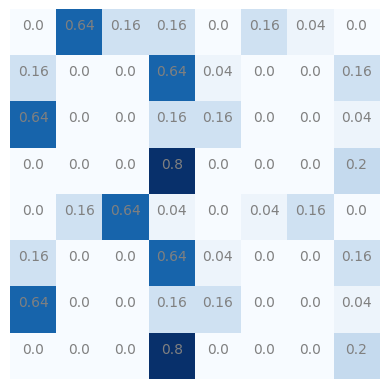

In [6]:
plt.imshow(PPi, cmap='Blues')
for i in range(nS*nA):
    for j in range(nS*nA):
        p = np.around(PPi[i, j], 2)
        plt.text(j, i, p, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [7]:
Rr = np.array(
    [
        # Action 1
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, 0.0, 0.0],
        # Action 2
        [0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, 0.0, 1.0],
        [0.0, 0.0, 0.0, 0.0],
    ]
)

R = np.sum(P * Rr, axis=1)

In [8]:
gamma = 0.8

# Q-function estimation

In [9]:
A = np.eye(nS*nA) - gamma * PPi
b = R
Q = np.linalg.inv(A) @ R

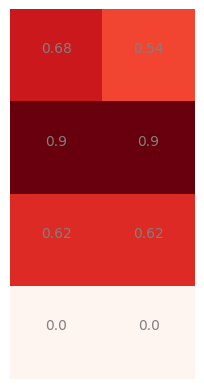

In [10]:
Q = Q.reshape(nA, nS).T
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [11]:
Q = np.zeros(nS*nA)
Qs = [Q]
for _ in range(40):
    Q = R + gamma * PPi @ Q
    Qs.append(Q)

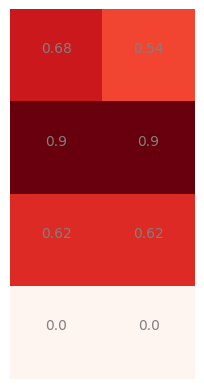

In [12]:
Q = Q.reshape(nA, nS).T
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

In [13]:
N = 10_000
Gs = []
for _ in range(N):
    G = 0
    s = 0
    a = 0
    for i in range(50):
        pS = P[s + a*nS, :]
        sp = np.random.choice(nS, p=pS)
        ap = np.random.choice(nA, p=[0.8, 0.2])
        
        r = Rr[s + a*nS, sp]
        G += (gamma**i) * r
        
        s = sp
        a = ap
        
    Gs.append(G)
Q = sum(Gs) / N
print(f"Estimated Value Function: {np.around(Q, 2)}")

Estimated Value Function: 0.68


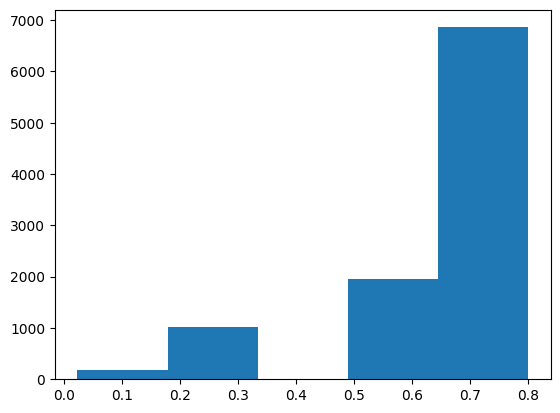

In [14]:
plt.hist(Gs, bins=5);